#Gather and Clean the Data

In [ ]:
#installing all the libraries since code is for Colab, ignore this part if you are doing it on jupyterlab/VSCode
!pip install alpaca-trade-api
!pip install pandas
!pip install pandas_ta
!pip install mplfinance
!pip install hvplot

In [ ]:
#importing the libraries installed
import alpaca_trade_api as tradeapi
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf

In [ ]:
#Loading Alpaca API keys
API_Key = #Input API Key here
API_secret_key = #Input API key
API_base_url = "https://paper-api.alpaca.markets" #(for live account trading, just remove the 'paper' from this link and it would work the same)

In [ ]:
#initializing Alpaca API on our collab environment
api = tradeapi.REST(API_Key, API_secret_key, API_base_url, api_version='v2')

In [ ]:
#function to fetch historical data with a date range from January 1st 2021 to February 1st 2025

def fetch_data(symbol, start, end, timeframe='1D'):
  start = '2021-01-01'
  end = '2025-02-01'
  barset = api.get_bars(symbol, timeframe, start=start, end=end, feed = 'iex')
  bars = list(barset)
  return bars

In [ ]:
#Get Vanguard Info
bars = fetch_data('voo', '2021-01-01', '2025-02-01')
print(bars)

[Bar({   'c': 338.97,
    'h': 344.99,
    'l': 335.6,
    'n': 504,
    'o': 344.99,
    't': '2021-01-04T05:00:00Z',
    'v': 35054,
    'vw': 339.445676}), Bar({   'c': 341.16,
    'h': 342.23,
    'l': 338.39,
    'n': 141,
    'o': 338.39,
    't': '2021-01-05T05:00:00Z',
    'v': 8638,
    'vw': 340.591106}), Bar({   'c': 343.4,
    'h': 346.41,
    'l': 339.34,
    'n': 289,
    'o': 339.68,
    't': '2021-01-06T05:00:00Z',
    'v': 31534,
    'vw': 343.590083}), Bar({   'c': 348.5,
    'h': 349.13,
    'l': 345.61,
    'n': 221,
    'o': 345.69,
    't': '2021-01-07T05:00:00Z',
    'v': 17123,
    'vw': 348.165702}), Bar({   'c': 350.53,
    'h': 350.58,
    'l': 346.81,
    'n': 192,
    'o': 349.935,
    't': '2021-01-08T05:00:00Z',
    'v': 20841,
    'vw': 349.354911}), Bar({   'c': 348.05,
    'h': 349.27,
    'l': 347.32,
    'n': 126,
    'o': 347.49,
    't': '2021-01-11T05:00:00Z',
    'v': 15578,
    'vw': 348.014023}), Bar({   'c': 348.69,
    'h': 348.95,
    'l': 3

In [ ]:
data = {
    'Date': [bar.t for bar in bars],
    'Open': [bar.o for bar in bars],
    'High': [bar.h for bar in bars],
    'Low': [bar.l for bar in bars],
    'Close': [bar.c for bar in bars],
    'Volume': [bar.v for bar in bars]
}

In [ ]:
#creating dataframe and setting index
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04 00:00:00-05:00,344.990,344.990,335.600,338.97,35054
2021-01-05 00:00:00-05:00,338.390,342.230,338.390,341.16,8638
2021-01-06 00:00:00-05:00,339.680,346.410,339.340,343.40,31534
2021-01-07 00:00:00-05:00,345.690,349.130,345.610,348.50,17123
2021-01-08 00:00:00-05:00,349.935,350.580,346.810,350.53,20841
...,...,...,...,...,...
2025-01-27 00:00:00-05:00,546.930,551.090,546.920,551.09,74620
2025-01-28 00:00:00-05:00,552.305,556.570,549.665,555.89,42878
2025-01-29 00:00:00-05:00,555.120,555.200,551.160,553.14,46218


In [ ]:
#export df to csv
df.to_csv('vanguard.csv')

In [ ]:
#Get the dtypes
df.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64


In [ ]:
 # Start Spark session
from pyspark.sql import SparkSession
# Read in data.
from pyspark import SparkFiles
spark = SparkSession.builder.appName("VanguardStock").getOrCreate()
spark.sparkContext.addFile('vanguard.csv')


In [ ]:
#Read in Spark session
spark_df = spark.read.csv(SparkFiles.get("vanguard.csv"), sep=",", header=True)
spark_df.show()

+--------------------+-------+------+------+------+------+
|                Date|   Open|  High|   Low| Close|Volume|
+--------------------+-------+------+------+------+------+
|2021-01-04 00:00:...| 344.99|344.99| 335.6|338.97| 35054|
|2021-01-05 00:00:...| 338.39|342.23|338.39|341.16|  8638|
|2021-01-06 00:00:...| 339.68|346.41|339.34| 343.4| 31534|
|2021-01-07 00:00:...| 345.69|349.13|345.61| 348.5| 17123|
|2021-01-08 00:00:...|349.935|350.58|346.81|350.53| 20841|
|2021-01-11 00:00:...| 347.49|349.27|347.32|348.05| 15578|
|2021-01-12 00:00:...| 348.48|348.95| 346.4|348.69| 34792|
|2021-01-13 00:00:...| 348.29|350.05|347.49|349.34| 13858|
|2021-01-14 00:00:...| 349.92|350.24|347.59|348.06| 56145|
|2021-01-15 00:00:...| 346.54|346.59|343.53|345.54| 16758|
|2021-01-19 00:00:...| 347.97|348.53| 346.6|348.14| 30896|
|2021-01-20 00:00:...| 350.15|353.55|350.13|353.05| 21441|
|2021-01-21 00:00:...| 353.42| 353.8|352.45| 353.1| 15217|
|2021-01-22 00:00:...| 351.63|352.78|351.15| 352.2|  934

In [ ]:
#Create a view
spark_df.createOrReplaceTempView('vanguard')

In [ ]:
#Spark query
spark.sql('SELECT * FROM vanguard').show()

+--------------------+-------+------+------+------+------+
|                Date|   Open|  High|   Low| Close|Volume|
+--------------------+-------+------+------+------+------+
|2021-01-04 00:00:...| 344.99|344.99| 335.6|338.97| 35054|
|2021-01-05 00:00:...| 338.39|342.23|338.39|341.16|  8638|
|2021-01-06 00:00:...| 339.68|346.41|339.34| 343.4| 31534|
|2021-01-07 00:00:...| 345.69|349.13|345.61| 348.5| 17123|
|2021-01-08 00:00:...|349.935|350.58|346.81|350.53| 20841|
|2021-01-11 00:00:...| 347.49|349.27|347.32|348.05| 15578|
|2021-01-12 00:00:...| 348.48|348.95| 346.4|348.69| 34792|
|2021-01-13 00:00:...| 348.29|350.05|347.49|349.34| 13858|
|2021-01-14 00:00:...| 349.92|350.24|347.59|348.06| 56145|
|2021-01-15 00:00:...| 346.54|346.59|343.53|345.54| 16758|
|2021-01-19 00:00:...| 347.97|348.53| 346.6|348.14| 30896|
|2021-01-20 00:00:...| 350.15|353.55|350.13|353.05| 21441|
|2021-01-21 00:00:...| 353.42| 353.8|352.45| 353.1| 15217|
|2021-01-22 00:00:...| 351.63|352.78|351.15| 352.2|  934

##Scale and cluster the Data

In [ ]:
# Import the sklearn libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Predict the model segments (clusters)
#stock_clusters = model.predict(df)

# View the stock segments
#print(stock_clusters)

In [ ]:
# Create a new column in the DataFrame with the predicted clusters
#df["StockCluster"] = stock_clusters
#df['PriceChange(%)'] = df['Close'].pct_change()*100
#df.head()

# Review the DataFrame
#df.head()

In [ ]:
#Create columns to cluster the data
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

#Create variable based on Golden Cross aand Death Cross
df['Signal'] = 0
df.loc[(df['MA_50'] > df['MA_200']), 'Signal'] = 1
df.loc[(df['MA_50'] < df['MA_200']), 'Signal'] = -1

#drop empty rows
df = df.dropna(subset=['MA_50', 'MA_200'])


In [ ]:
df.shape

(826, 8)

In [ ]:
#Get the features
features = ['Close', 'MA_50', 'MA_200']

X = df[features]

y = df['Signal']

In [ ]:
 #split data into training sets
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Classify the data
classifier = LogisticRegression(solver='lbfgs', random_state=42)
classifier


 #initiate logistic regression model
 model = LogisticRegression()


 #fit the model
 model.fit(X_train, y_train)

 #make predictions
 y_pred = model.predict(X_test)

 #evaluate
 accuracy = accuracy_score(y_test, y_pred)
 print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
print(df['Signal'].value_counts())

Signal
 1    601
-1    225
Name: count, dtype: int64


In [ ]:
# Bear count
bear_count = df[df['Signal'] == 1]
bear_count.count()

,0
Open,601
High,601
Low,601
Close,601
Volume,601
MA_50,601
MA_200,601
Signal,601


In [ ]:
#bull count
bull_count = df[df['Signal'] == -1]
bull_count.count()

,0
Open,225
High,225
Low,225
Close,225
Volume,225
MA_50,225
MA_200,225
Signal,225


## Create Plots

In [ ]:
 # Create a scatter plot with x=High":,  y="Low" or Open/Close?
import hvplot.pandas

df.hvplot.scatter(
    x="High",
    y="Low",
    by="Signal",
    hover_cols = ["Volume"],
    title = "Scatter Plot by Stock Segment")

:NdOverlay   [Signal]
   :Scatter   [High]   (Low,Volume)

In [ ]:
#Create a plot by Price Range and Price Change, by Cluster
df.hvplot.scatter(
    x="MA_50",
    y="MA_200",
    by="Signal",
    hover_cols = ["Volume"],
    title = "Scatter Plot by Stock Segment")

:NdOverlay   [Signal]
   :Scatter   [MA_50]   (MA_200,Volume)

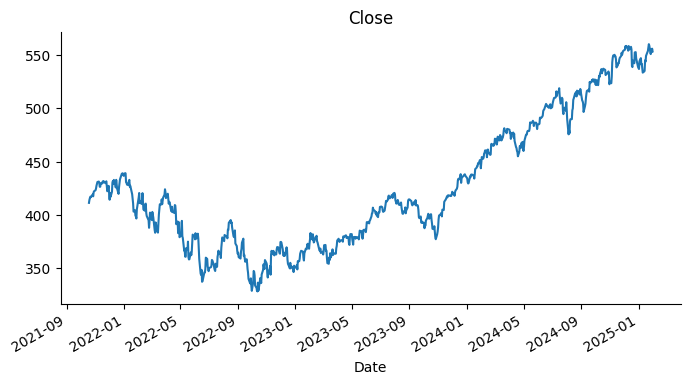

In [ ]:
#graph the date and closing numbers

from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

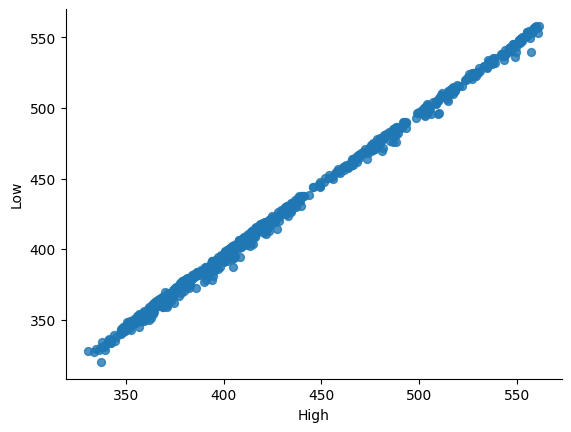

In [ ]:
#test graph for fun (low vs. high)
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

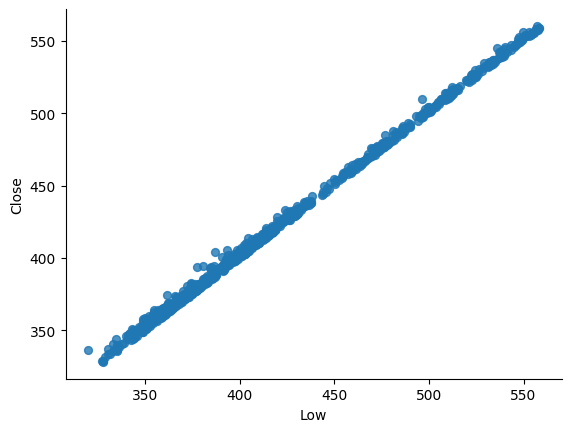

In [ ]:
#track the low and closing prices
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

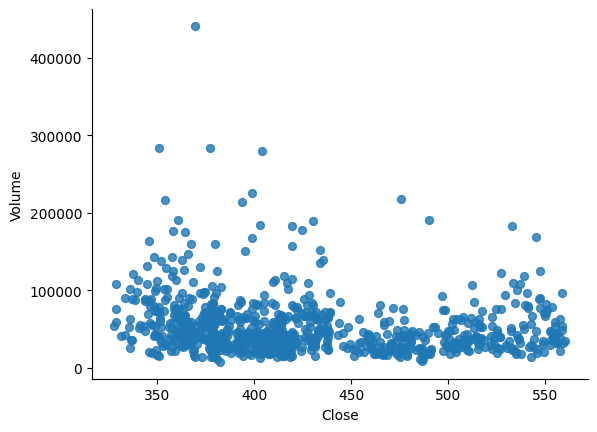

In [ ]:
#tracking volume and closing shares
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

##Run The ML

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Sample DataFrame structure (ensure df['Close'] exists)
# df = pd.read_csv("your_data.csv")  # Load your dataset

In [ ]:
# Calculate actual returns
df['Returns'] = df['Close'].pct_change()

<ipython-input-32-6a0e3d7dec4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Returns'] = df['Close'].pct_change()


In [ ]:
# Create Signal column: 1 if return > 0 (bullish), -1 if return < 0 (bearish)
df['Signal'] = np.where(df['Returns'] > 0, 1, -1)

<ipython-input-33-c0211b98e8b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'] = np.where(df['Returns'] > 0, 1, -1)


In [ ]:
# Compute moving averages
short_window = 50   # Fast SMA
long_window = 200   # Slow SMA

df['SMA_Fast'] = df['Close'].rolling(window=short_window).mean()
df['SMA_Slow'] = df['Close'].rolling(window=long_window).mean()

<ipython-input-34-ccfc8bfe4fc8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA_Fast'] = df['Close'].rolling(window=short_window).mean()
<ipython-input-34-ccfc8bfe4fc8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA_Slow'] = df['Close'].rolling(window=long_window).mean()


In [ ]:
# Drop NaN values
df = df.dropna(subset=['SMA_Fast', 'SMA_Slow', 'Signal'])

In [ ]:
# Features and target
X = df[['SMA_Fast', 'SMA_Slow']]
y = df['Signal']

In [ ]:
# Manually split data (80% train, 20% test)
#split_point = int(len(df) * 0.8)
#X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
#y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train_start_date = '2021-01-01'
train_end_date = '2024-07-31'
test_start_date = '2024-08-01'
test_end_date = '2025-02-01'
train_data = df.loc[train_start_date:train_end_date]
test_data = df.loc[test_start_date:test_end_date]

In [ ]:
train_data.head()

,Open,High,Low,Close,Volume,MA_50,MA_200,Signal,Returns,SMA_Fast,SMA_Slow
Date,,,,,,,,,,,
2022-08-03 00:00:00-04:00,377.67,381.760,377.670,381.085,30681,361.0177,398.20400,1,0.015441,361.0177,398.20400
2022-08-04 00:00:00-04:00,381.00,381.430,379.725,380.700,24031,361.3375,398.05120,-1,-0.001010,361.3375,398.05120
2022-08-05 00:00:00-04:00,376.57,380.235,376.570,379.910,14713,361.6941,397.88040,-1,-0.002075,361.6941,397.88040
2022-08-08 00:00:00-04:00,382.53,383.770,379.140,379.680,18478,361.9843,397.69975,-1,-0.000605,361.9843,397.69975
2022-08-09 00:00:00-04:00,378.82,379.090,377.290,377.960,13141,362.0917,397.50425,-1,-0.004530,362.0917,397.50425


In [ ]:
#split data into training and test sets
X_train = train_data[['SMA_Fast', 'SMA_Slow']]
y_train = train_data['Signal']
X_test = test_data[['SMA_Fast', 'SMA_Slow']]
y_test = test_data['Signal']

In [ ]:
#Create standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.58
              precision    recall  f1-score   support

          -1       0.50      0.02      0.04        53
           1       0.58      0.99      0.73        73

    accuracy                           0.58       126
   macro avg       0.54      0.50      0.38       126
weighted avg       0.55      0.58      0.44       126



##Support Vector Machine

In [ ]:
#Import dependencies
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")

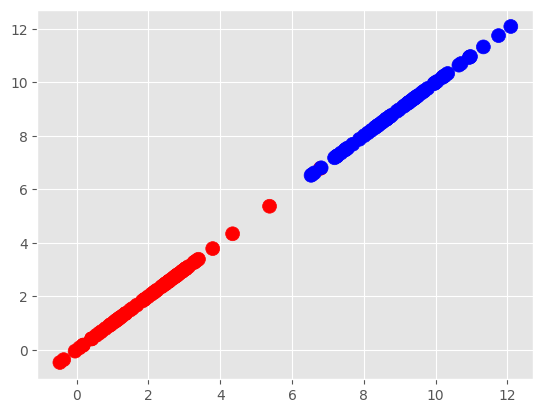

In [ ]:
#Make Blobs - - This isn't pulling any of our data - need to change something here
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, centers=2, random_state=42, cluster_std=1.25)
plt.scatter(X[:, 1], X[:, -1], c=y, s=100, cmap="bwr")
plt.show()

In [ ]:
# Support vector machine linear classifier
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

In [ ]:
# Plot the decision boundaries
x_min = X[:, 1].min()
x_max = X[:, 1].max()
y_min = X[:, -1].min()
y_max = X[:, -1].max()
print(x_min, x_max, y_min, y_max)

-0.4669400654623952 12.09333876880493 -0.4669400654623952 12.09333876880493


In [ ]:
 # Store decision boundaries in mesh grid
XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
print(XX)

[[-0.46694007 -0.46694007 -0.46694007 -0.46694007 -0.46694007 -0.46694007
  -0.46694007 -0.46694007 -0.46694007 -0.46694007 -0.46694007 -0.46694007
  -0.46694007]
 [ 0.53305993  0.53305993  0.53305993  0.53305993  0.53305993  0.53305993
   0.53305993  0.53305993  0.53305993  0.53305993  0.53305993  0.53305993
   0.53305993]
 [ 1.53305993  1.53305993  1.53305993  1.53305993  1.53305993  1.53305993
   1.53305993  1.53305993  1.53305993  1.53305993  1.53305993  1.53305993
   1.53305993]
 [ 2.53305993  2.53305993  2.53305993  2.53305993  2.53305993  2.53305993
   2.53305993  2.53305993  2.53305993  2.53305993  2.53305993  2.53305993
   2.53305993]
 [ 3.53305993  3.53305993  3.53305993  3.53305993  3.53305993  3.53305993
   3.53305993  3.53305993  3.53305993  3.53305993  3.53305993  3.53305993
   3.53305993]
 [ 4.53305993  4.53305993  4.53305993  4.53305993  4.53305993  4.53305993
   4.53305993  4.53305993  4.53305993  4.53305993  4.53305993  4.53305993
   4.53305993]
 [ 5.53305993  5.53305

In [ ]:
# Use the decision_function function to identify sides of the hyperplane
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
print(Z)

[ 0.94911125  0.70857833  0.46804541  0.22751249 -0.01302042 -0.25355334
 -0.49408626 -0.73461917 -0.97515209 -1.21568501 -1.45621792 -1.69675084
 -1.93728376  1.2615148   1.02098188  0.78044896  0.53991605  0.29938313
  0.05885021 -0.1816827  -0.42221562 -0.66274854 -0.90328146 -1.14381437
 -1.38434729 -1.62488021  1.57391835  1.33338543  1.09285251  0.8523196
  0.61178668  0.37125376  0.13072085 -0.10981207 -0.35034499 -0.5908779
 -0.83141082 -1.07194374 -1.31247665  1.8863219   1.64578898  1.40525606
  1.16472315  0.92419023  0.68365731  0.4431244   0.20259148 -0.03794144
 -0.27847435 -0.51900727 -0.75954019 -1.0000731   2.19872545  1.95819253
  1.71765962  1.4771267   1.23659378  0.99606087  0.75552795  0.51499503
  0.27446211  0.0339292  -0.20660372 -0.44713664 -0.68766955  2.511129
  2.27059608  2.03006317  1.78953025  1.54899733  1.30846442  1.0679315
  0.82739858  0.58686567  0.34633275  0.10579983 -0.13473308 -0.375266
  2.82353255  2.58299963  2.34246672  2.1019338   1.861400

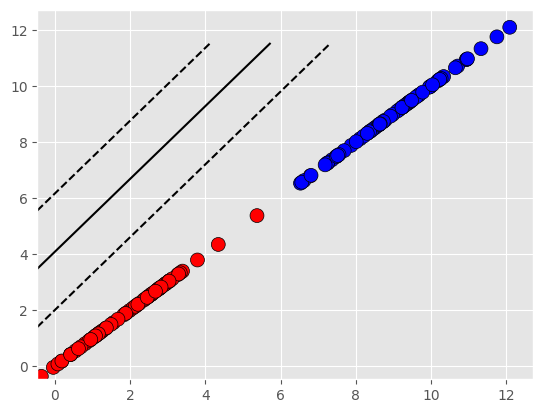

In [ ]:
# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, -1], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

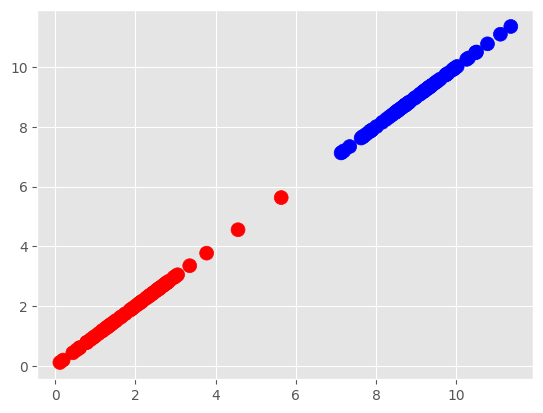

In [ ]:
# Demonstrate that support vectors will sometimes cross the margin
X, y = make_blobs(n_samples=150, centers=2, random_state=42, cluster_std=.95)
plt.scatter(X[:, -1], X[:, 1], c=y, s=100, cmap="bwr")
plt.show()

In [ ]:
# Split data into training and testing - DO WE NEED THIS, AGAIN? DO WE NEED TO RENAME THESE?
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
 # Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0])

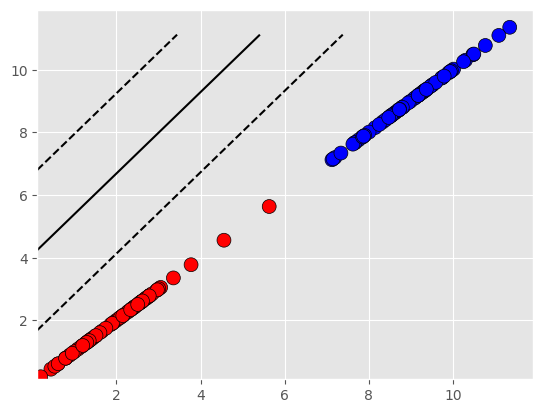

In [ ]:
# Plot the decision boundaries
x_min = X[:, -1].min()
x_max = X[:, -1].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, -1], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [ ]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       1.00      1.00      1.00        21
         red       1.00      1.00      1.00        17

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

